# STEPES-BD

https://sites.google.com/view/stepes-bd

**Autor: João Paulo dos Santos Mendes**
(joaopaulo164@gmail.com)

### Obtendo dados sobre os infectados pela COVID-19
Processo de Tratamento dos dados após obtenção deles do Bando de Dados/Blockchain do BigchainDB (MongoDB) via **Apache Spark**

In [37]:
#Carregando biblibotecas
sc = spark.sparkContext

In [38]:
#Carregando assets da Blockchain
assets_df = spark.read.json("~/../assets.json")

#Obtendo todos os Pacientes
pacientes_raw_df = assets_df.select("data.Paciente.*")
pacientes_raw_df.printSchema()

root
 |-- CPF: string (nullable = true)
 |-- Endereco: struct (nullable = true)
 |    |-- Bairro: string (nullable = true)
 |    |-- CEP: string (nullable = true)
 |    |-- Cidade: string (nullable = true)
 |    |-- Latitude: string (nullable = true)
 |    |-- Longitude: string (nullable = true)
 |    |-- Numero: string (nullable = true)
 |    |-- Rua: string (nullable = true)
 |    |-- UF: string (nullable = true)
 |-- FatorRH: string (nullable = true)
 |-- GrupoSanguineo: string (nullable = true)
 |-- Id: long (nullable = true)
 |-- Nascimento: string (nullable = true)
 |-- Nome: string (nullable = true)
 |-- PrivateKey: string (nullable = true)
 |-- PublicKey: string (nullable = true)



In [39]:
#Tratando os dados dos pacientes
pacientes_df = pacientes_raw_df.select("Id", "Nome", "Nascimento").where("Nome is not Null")
pacientes_df.show()
pacientes_df.count()

+-----+--------------------+----------+
|   Id|                Nome|Nascimento|
+-----+--------------------+----------+
| 4243|      Aury Lucarelli|23/03/2015|
|11516|  Apoliano Bergamini|21/11/1920|
|17214|       Meria Almeida|11/05/1966|
|21873|        Eudite Bueno|15/08/1992|
|   76|      Claudian Rizza|18/09/1931|
| 4684|   Alexabdre Holanda|20/11/1927|
| 8387|    Marriete Camargo|16/01/1940|
|27481|  Francimone Boscolo|25/07/1946|
| 2303|    Jessiani Boscolo|12/06/1941|
|19774|   Leildes Carvalhal|17/04/1993|
|24207|  Carliandra Almeida|09/05/2004|
|27438|Christiany Gagliardi|04/11/1935|
| 1655|    Elonir Policarpo|20/05/1981|
|11770|        Cilei Fabris|26/06/1977|
|20903|      Zaneide Macedo|18/09/1934|
|24807|    Ziene Di gennaro|17/02/1935|
|29045|       Hiudy De rosa|19/09/1976|
|24768|   Valdenilsa Cabral|07/09/1971|
|27871|     Nazare Mendonça|07/01/1982|
| 1786|   Alexsadro Barbera|18/05/1924|
+-----+--------------------+----------+
only showing top 20 rows



1840

In [40]:
#Obtendo todos Exames Covid-19
exames_covid_raw_df = assets_df.select("data.Atendimento.Hospital.Exame_covid.*")
exames_covid_raw_df.printSchema()

root
 |-- Data: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Paciente: long (nullable = true)
 |-- Resultado: string (nullable = true)
 |-- Unix_time: long (nullable = true)



In [41]:
#Tratando os dados dos pacientes
exames_covid_df = exames_covid_raw_df.select("Paciente", "Resultado", "Data", "Unix_time").where("Resultado is not Null")
exames_covid_df.show()
exames_covid_df.count()

+--------+---------+----------+----------+
|Paciente|Resultado|      Data| Unix_time|
+--------+---------+----------+----------+
|    4243| POSITIVO|13/04/2020|1586815451|
|   11516| POSITIVO|13/04/2020|1586815467|
|   17214| POSITIVO|18/03/2020|1584569258|
|   21873| POSITIVO|18/03/2020|1584569267|
|      76| POSITIVO|22/03/2020|1584914943|
|    4684| POSITIVO|22/03/2020|1584914951|
|    8387| POSITIVO|22/03/2020|1584914959|
|   27481| POSITIVO|23/03/2020|1585001398|
|    2303| POSITIVO|23/03/2020|1585001406|
|   19774| POSITIVO|25/03/2020|1585174242|
|   24207| POSITIVO|25/03/2020|1585174250|
|   27438| POSITIVO|26/03/2020|1585260718|
|    1655| POSITIVO|26/03/2020|1585260730|
|   11770| POSITIVO|26/03/2020|1585260746|
|   20903| POSITIVO|27/03/2020|1585347464|
|   24807| POSITIVO|27/03/2020|1585347471|
|   29045| POSITIVO|27/03/2020|1585347479|
|   24768| POSITIVO|28/03/2020|1585433930|
|   27871| POSITIVO|28/03/2020|1585433937|
|    1786| POSITIVO|28/03/2020|1585433945|
+--------+-

1835

In [42]:
# register the DataFrame como temp tables
pacientes_df.registerTempTable("pacientes")
exames_covid_df.registerTempTable("exames_covid")
   
result = spark.sql("SELECT p.Id, p.Nome, (TO_DATE(CAST(UNIX_TIMESTAMP(p.Nascimento, \
'dd/mm/yyyy') AS TIMESTAMP))) as Nascimento, \
e.Resultado, (TO_DATE(CAST(UNIX_TIMESTAMP(e.Data, 'dd/mm/yyyy') AS TIMESTAMP))) as Data \
FROM pacientes p, exames_covid e").where("p.Id = e.Paciente")
result.show()

+-----+--------------------+----------+---------+----------+
|   Id|                Nome|Nascimento|Resultado|      Data|
+-----+--------------------+----------+---------+----------+
| 4243|      Aury Lucarelli|2015-01-23| POSITIVO|2020-01-13|
|11516|  Apoliano Bergamini|1920-01-21| POSITIVO|2020-01-13|
|17214|       Meria Almeida|1966-01-11| POSITIVO|2020-01-18|
|21873|        Eudite Bueno|1992-01-15| POSITIVO|2020-01-18|
|   76|      Claudian Rizza|1931-01-18| POSITIVO|2020-01-22|
| 4684|   Alexabdre Holanda|1927-01-20| POSITIVO|2020-01-22|
| 8387|    Marriete Camargo|1940-01-16| POSITIVO|2020-01-22|
|27481|  Francimone Boscolo|1946-01-25| POSITIVO|2020-01-23|
| 2303|    Jessiani Boscolo|1941-01-12| POSITIVO|2020-01-23|
|19774|   Leildes Carvalhal|1993-01-17| POSITIVO|2020-01-25|
|24207|  Carliandra Almeida|2004-01-09| POSITIVO|2020-01-25|
|27438|Christiany Gagliardi|1935-01-04| POSITIVO|2020-01-26|
| 1655|    Elonir Policarpo|1981-01-20| POSITIVO|2020-01-26|
|11770|        Cilei Fab

In [43]:
# register the DataFrame como temp tables
result.registerTempTable("result")
final_data = spark.sql("SELECT INT(datediff(to_date(Data), to_date(Nascimento))/365) as Idade \
          FROM result")

# converter para Pandas Dataframe
final_data_pandas = final_data.orderBy("Idade").toPandas()
print(final_data_pandas)

      Idade
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
...     ...
1855     99
1856     99
1857     99
1858     99
1859     99
1860     99
1861     99
1862     99
1863     99
1864     99
1865     99
1866    100
1867    100
1868    100
1869    100
1870    100
1871    100
1872    100
1873    100
1874    100
1875    100
1876    100
1877    100
1878    100
1879    100
1880    100
1881    100
1882    100
1883    100
1884    100

[1885 rows x 1 columns]


# Histograma (Histogram)
Um histograma é uma representação da distribuição de dados. Essa função chama matplotlib.pyplot.hist (), em cada série no DataFrame, resultando em um histograma por coluna.

### Histograma 1 (cada barra equivale a 2 anos)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc23fbfb080>]],
      dtype=object)

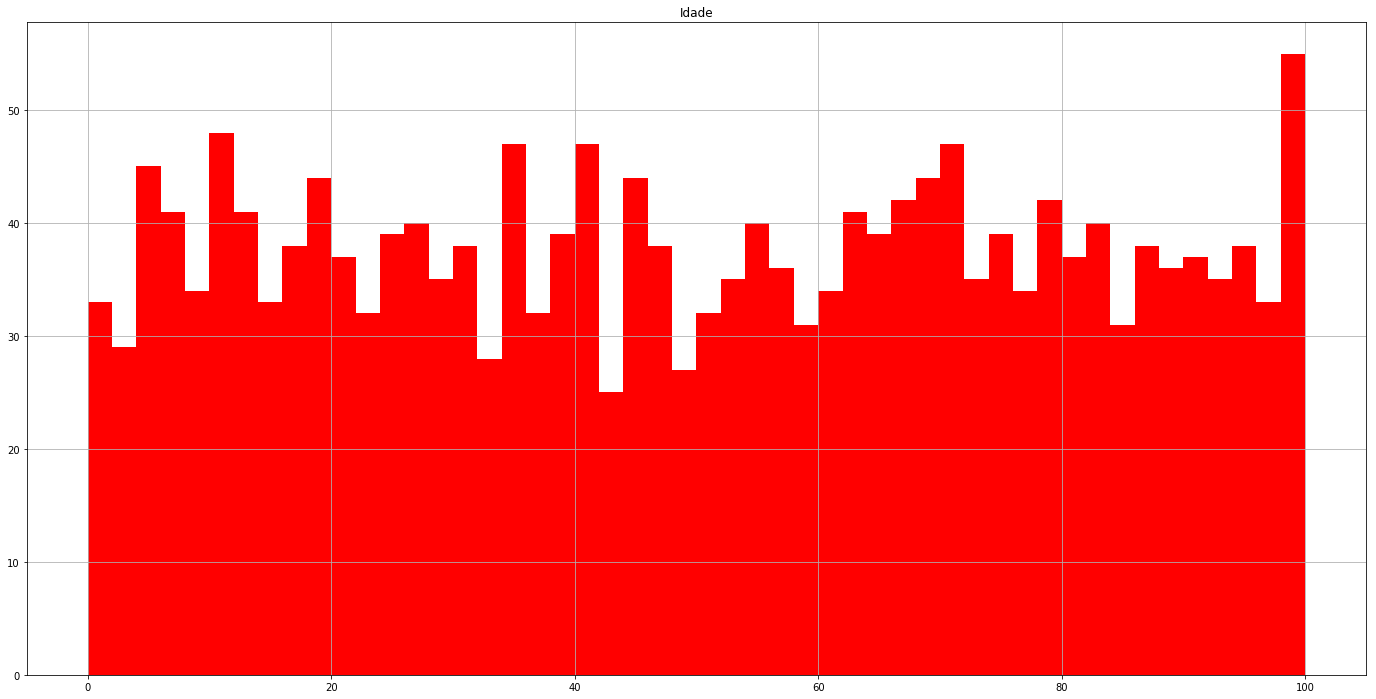

In [44]:
final_data_pandas[['Idade']].hist(bins=50, figsize=(24,12), color="red")

### Histograma 2 (cada barra equivale a 5 anos)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc23fbf2c50>]],
      dtype=object)

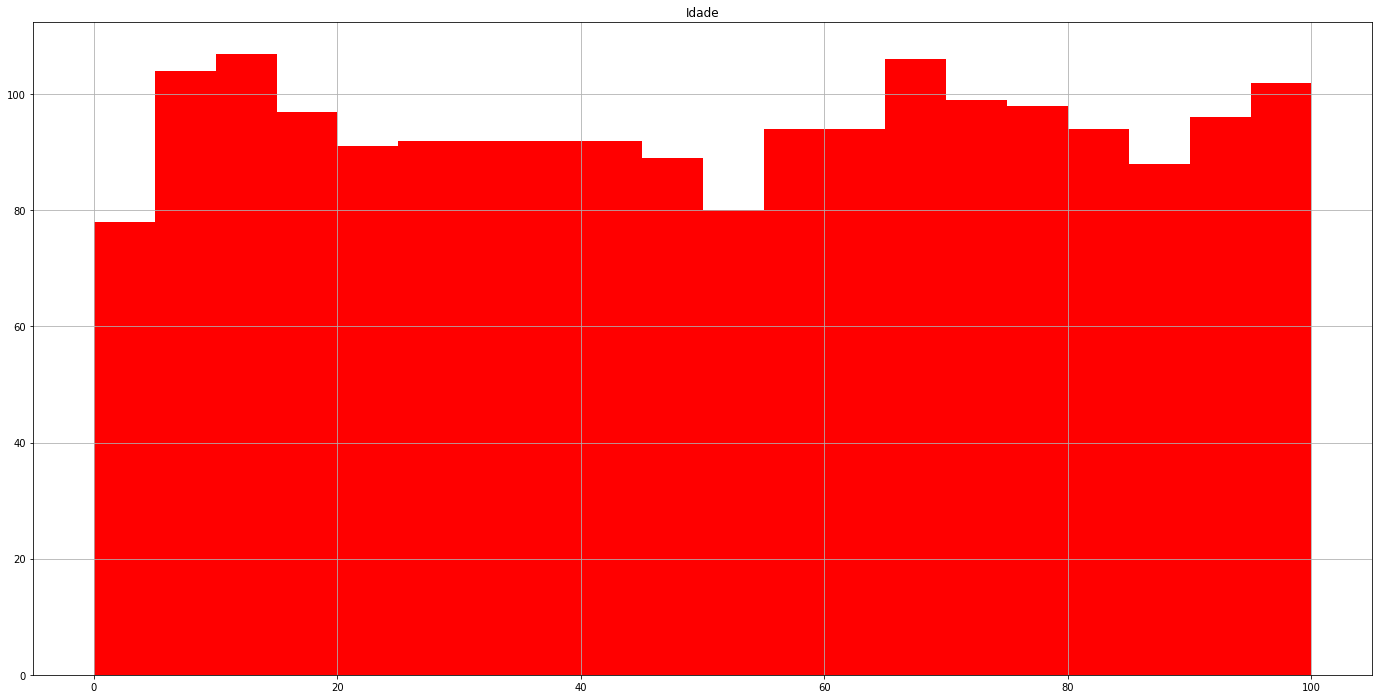

In [45]:
final_data_pandas[['Idade']].hist(bins=20, figsize=(24,12), color="red")

# Diagrama de caixa (Box plot)
Em estatística descritiva, diagrama de caixa, diagrama de extremos e quartis, boxplot ou box plot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis (ver figura 1, onde o eixo horizontal representa a variável). O boxplot tem uma reta (whisker ou fio de bigode) que estende–se verticalmente ou horizontalmente a partir da caixa, indicando a variabilidade fora do quartil superior e do quartil inferior.[1] Os valores atípicos ou outliers (valores discrepantes) podem ser plotados como pontos individuais.[2] O boxplot não é paramétrico, apresentando a variação em amostras de uma população estatística sem fazer qualquer suposição da distribuição estatística subjacente.[3] Os espaços entre as diferentes partes da caixa indicam o grau de dispersão, a obliquidade nos dados e os outliers.[4] O boxplot também permite testimar visualmente vários {\displaystyle L-}{\displaystyle L-}estimadores como amplitude interquartil, midhinge, range, mid-range, e trimean.[5] Em resumo, o boxplot identifica onde estão localizados 50% dos valores mais prováveis, a mediana e os valores extremos.[6]
https://pt.wikipedia.org/wiki/Diagrama_de_caixa

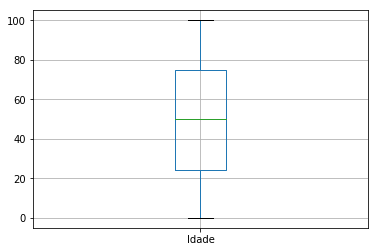

In [46]:
final_data_pandas.boxplot('Idade', showfliers=False)

In [47]:
final_data_pandas2 = final_data.groupBy("Idade").count().orderBy("Idade").where("Idade > 49").toPandas()
print(final_data_pandas2)

    Idade  count
0      50     12
1      51     20
2      52     20
3      53     15
4      54     13
5      55     27
6      56     22
7      57     14
8      58     14
9      59     17
10     60     14
11     61     20
12     62     15
13     63     26
14     64     19
15     65     20
16     66     20
17     67     22
18     68     19
19     69     25
20     70     25
21     71     22
22     72     21
23     73     14
24     74     17
25     75     22
26     76     18
27     77     16
28     78     23
29     79     19
30     80     19
31     81     18
32     82     22
33     83     18
34     84     17
35     85     14
36     86     19
37     87     19
38     88     18
39     89     18
40     90     15
41     91     22
42     92     14
43     93     21
44     94     24
45     95     14
46     96     17
47     97     16
48     98     16
49     99     20
50    100     19


# Gráfico de barras (Bar Plot)
Um gráfico de barras é um gráfico que apresenta dados categóricos com barras retangulares com comprimentos proporcionais aos valores que eles representam. Um gráfico de barras mostra comparações entre categorias discretas. Um eixo do gráfico mostra as categorias específicas sendo comparadas e o outro eixo representa um valor medido.

Text(0.5, 1.0, 'Mortes por Covid-19 ( IDADE > 50)')

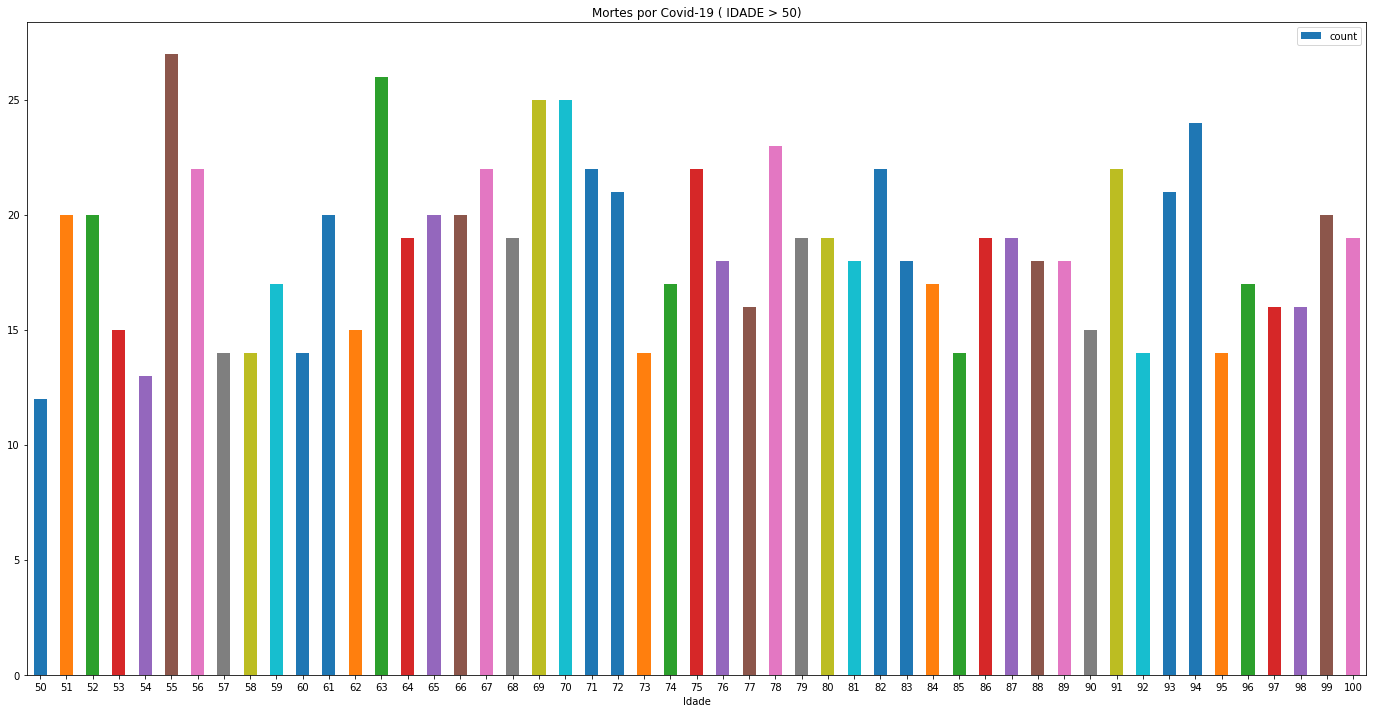

In [36]:
final_data_pandas2.plot.bar(x='Idade', y='count', rot=0, figsize=(24,12)).set_title('Mortes por Covid-19 ( IDADE > 50)')